<a href="https://colab.research.google.com/github/liuchentue/SVM-based-human-detection/blob/mtk3-loading-images/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install dependencies: 
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 24kB/s 
     |████████████████████████████████| 6.6MB 28.7MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 276kB 10.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=c713ff90b4e9590d809d10bb44d9b413f36c588263418606076ef366a532c1e7
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pi

In [2]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

# get image
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./input.jpg")

# Create config
cfg = get_cfg()
cfg.merge_from_file("/usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

--2020-12-04 18:29:48--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.69.196
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.69.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K   745KB/s    in 0.3s    

2020-12-04 18:29:48 (745 KB/s) - ‘input.jpg’ saved [209222/209222]



model_final_f6e8b1.pkl: 243MB [00:20, 12.0MB/s]                           


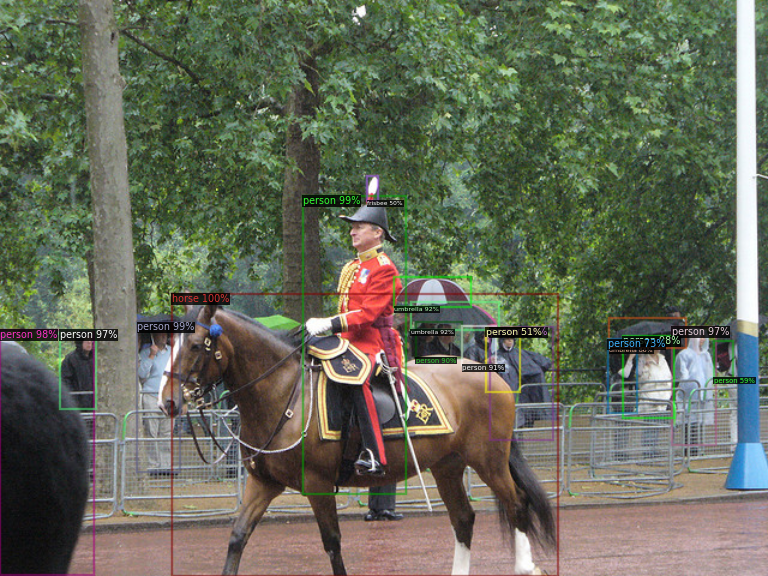

In [3]:
from google.colab.patches import cv2_imshow
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

Cloning into 'SVM-based-human-detection'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 2021 (delta 1), reused 0 (delta 0), pack-reused 2012
Receiving objects: 100% (2021/2021), 85.99 MiB | 21.11 MiB/s, done.
Resolving deltas: 100% (3/3), done.


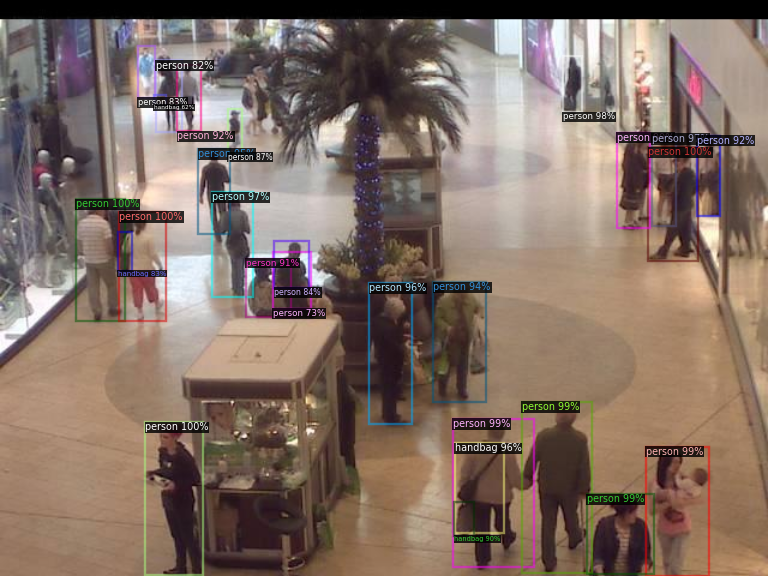

In [4]:
# to clear directory
#!rm -rf SVM-based-human-detection

# to clone directory, -b for specific branch
!git clone -b mtk3-loading-images https://github.com/liuchentue/SVM-based-human-detection.git

img0001 = cv2.imread("SVM-based-human-detection/frames/seq_000001.jpg")



# Make prediction
outputs = predictor(img0001)

v = Visualizer(img0001[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [5]:
import numpy as np
import tensorflow as tf

inst=outputs["instances"]


classes=inst.get("pred_classes")
precision=inst.get("scores")
locations=inst.get("pred_boxes")

classes=tf.make_ndarray(tf.make_tensor_proto(classes.cpu())) 
precision=tf.make_ndarray(tf.make_tensor_proto(precision.cpu())) 
locations=tf.make_ndarray(tf.make_tensor_proto(locations.tensor.cpu())) 

print(classes)
print(precision)
print(locations)

#classes: what type of object is detected (for example, 0 for person; 25 for umbrella; 17 for horse) (based on COCO dataset)
#locations: the boxes locations of the detected objects (in our case, there are 17 boxes in the example photo)
#precision: the probability of the corresponding object classification to be accurate
numofperson=0
for i in range(len(classes)):
  if (classes[i]==0):
    numofperson=numofperson+1
print("Number of people in the picture:",numofperson)

personboxes=[]



[ 0  0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0 26  0  0  0 26
  0  0 26]
[0.99764603 0.9960686  0.99573946 0.9951308  0.99439806 0.99408394
 0.9940659  0.9937627  0.9891747  0.98303497 0.971675   0.9700106
 0.9619936  0.9569108  0.9521542  0.9363497  0.9236114  0.9171609
 0.9088501  0.9016246  0.86679894 0.8353428  0.82828575 0.82596356
 0.8224918  0.7311735  0.61719954]
[[ 63.240616 166.73497  104.43528  268.17755 ]
 [ 99.55808  177.3951   138.73625  267.90753 ]
 [540.3698   123.65384  581.41815  218.10176 ]
 [121.06658  352.1245   169.03326  479.10785 ]
 [489.2236   411.96225  544.9237   478.32135 ]
 [538.119    372.43994  591.10223  479.7927  ]
 [435.1038   335.36786  493.52234  477.46072 ]
 [514.29016  111.3979   541.6556   190.75742 ]
 [377.52753  349.40576  444.9294   472.7921  ]
 [469.21545   47.25935  485.00967   94.37336 ]
 [176.76968  160.99393  211.14487  247.84843 ]
 [543.27826  112.442856 563.51544  189.08191 ]
 [307.90707  236.61397  343.68985  353.99268 ]
 [37